In [1]:
!pip install rasterio

In [26]:
pip install rasterstats

  Obtaining dependency information for rasterstats from https://files.pythonhosted.org/packages/5e/0b/bd73621d2a5f87da97158c5c77a4bf31e27d60cf6bcc6ddea532043cc21d/rasterstats-0.20.0-py3-none-any.whl.metadata
  Obtaining dependency information for fiona from https://files.pythonhosted.org/packages/95/32/c1d53b4d77926414ffdf5bd38344e900e378ae9ccb2a65754cdb6d5344c2/fiona-1.10.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
     ---------------------------------------- 58.1/58.1 kB 3.0 MB/s eta 0:00:00
  Obtaining dependency information for simplejson from https://files.pythonhosted.org/packages/01/85/b52f24859237b4e9d523d5655796d911ba3d46e242eb1959c45b6af5aedd/simplejson-3.20.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.5 MB 3.3 MB/s eta 0:00:08
    --------------------------------------- 0.3/24.5 MB 5.0 MB/s eta 0:00

# We import the shapefile data by districts of Peru

In [27]:
import os
import geopandas as gpd

shapefile_path = os.path.join("shape_file", "DISTRITOS.shp")
gdf = gpd.read_file(shapefile_path)
gdf.head()

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."


In [3]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask

# Cargar shapefile
shapefile_path = r"D:\Proyectos\DATA RASTER\shape_file\DISTRITOS.shp"
gdf = gpd.read_file(shapefile_path)

gdf.head()

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."


In [9]:
import rasterio

# Ruta al archivo
archivo = "Prec_raster.tif"

# Abrir el archivo
with rasterio.open(archivo) as src:
    print("Ancho:", src.width)
    print("Alto:", src.height)
    print("Número de bandas:", src.count)
    print("Sistema de coordenadas:", src.crs)
    print("Transformación (afín):", src.transform)

    # Leer los datos de la primera banda
    banda1 = src.read(1)
    banda2 = src.read(2)
    banda3 = src.read(3)
    banda4 = src.read(4)
    banda5 = src.read(5)


Ancho: 133
Alto: 198
Número de bandas: 5
Sistema de coordenadas: EPSG:4326
Transformación (afín): | 0.10, 0.00,-81.25|
| 0.00,-0.10, 0.95|
| 0.00, 0.00, 1.00|


- **Ancho: 133 píxeles**  
  Esto indica que el raster tiene 133 columnas, es decir, 133 celdas horizontales.

- **Alto: 198 píxeles**  
  Significa que tiene 198 filas, es decir, 198 celdas verticales.

- **Número de bandas: 5**  
  Cada banda puede representar una dimensión distinta del mismo fenómeno.

- **Sistema de coordenadas: EPSG:4326**

- **Transformación afín:**  
  Esto nos permite traducir las coordenadas de píxeles a coordenadas geográficas reales:

  - El valor `-81.25` indica la **longitud del borde izquierdo** del raster.
  - El valor `0.95` indica la **latitud del borde superior**.
  - El valor `0.10` nos dice que cada píxel equivale a **0.10 grados de longitud**.
  - El valor `-0.10` nos dice que cada fila de píxeles desciende en **0.10 grados de latitud**  
    (por eso es negativo: el raster se "construye" de arriba hacia abajo).




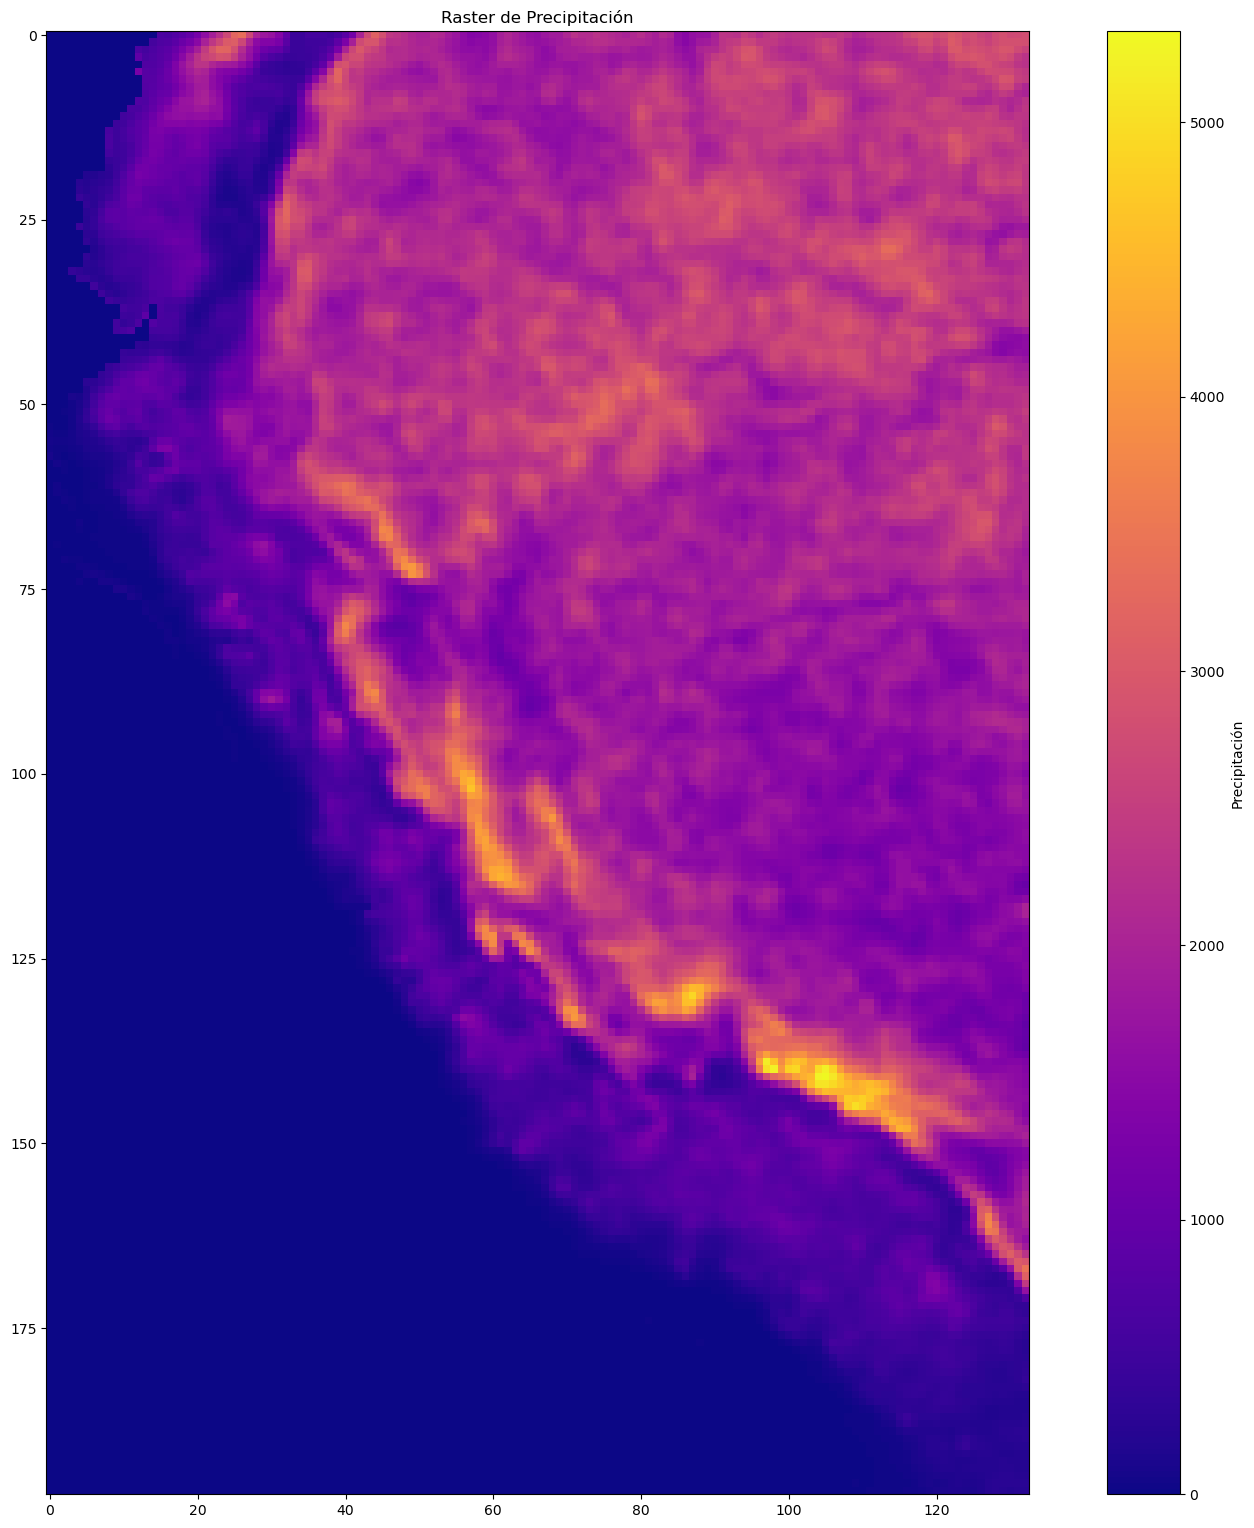

In [14]:
import matplotlib.pyplot as plt

# Ser curisoso
plt.figure(figsize=(20, 19))
plt.imshow(banda1, cmap='plasma')
plt.colorbar(label='Precipitación banda 1')
plt.title("Raster de Precipitación")
plt.show()


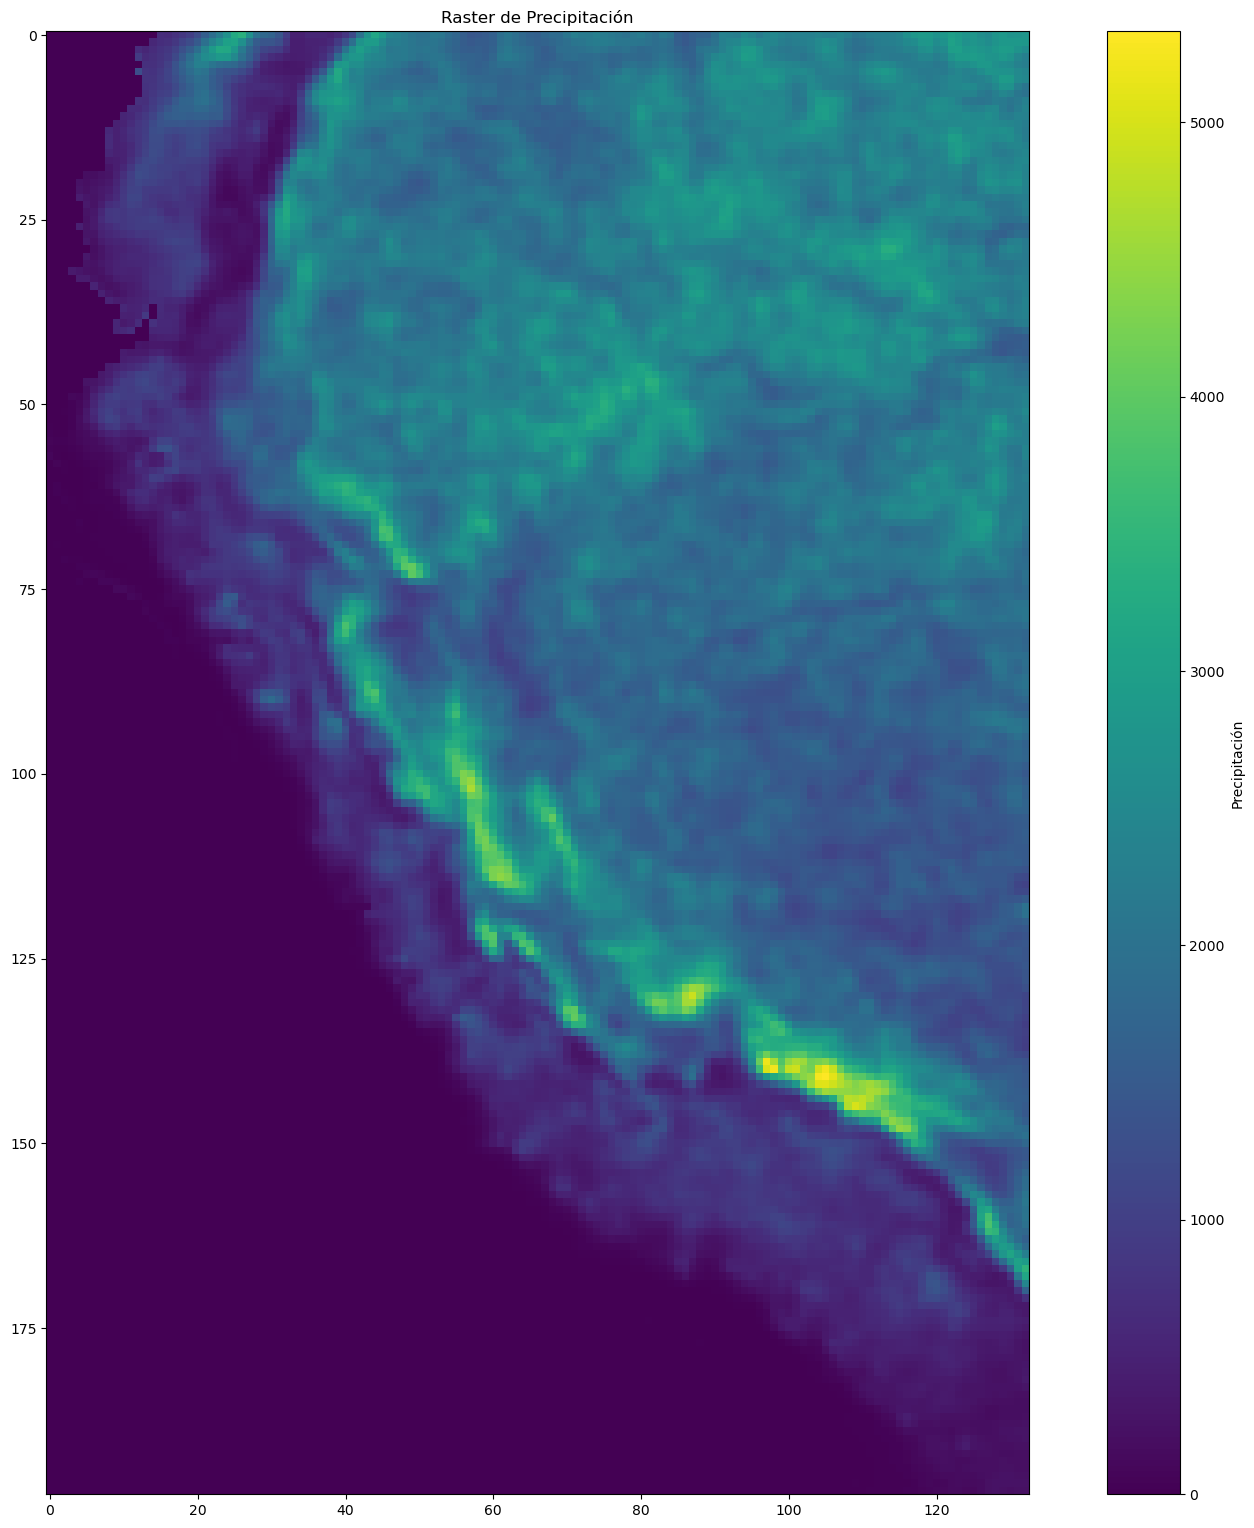

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 19))
plt.imshow(banda1, cmap='viridis')
plt.colorbar(label='Precipitación')
plt.title("Raster de Precipitación")
plt.show()


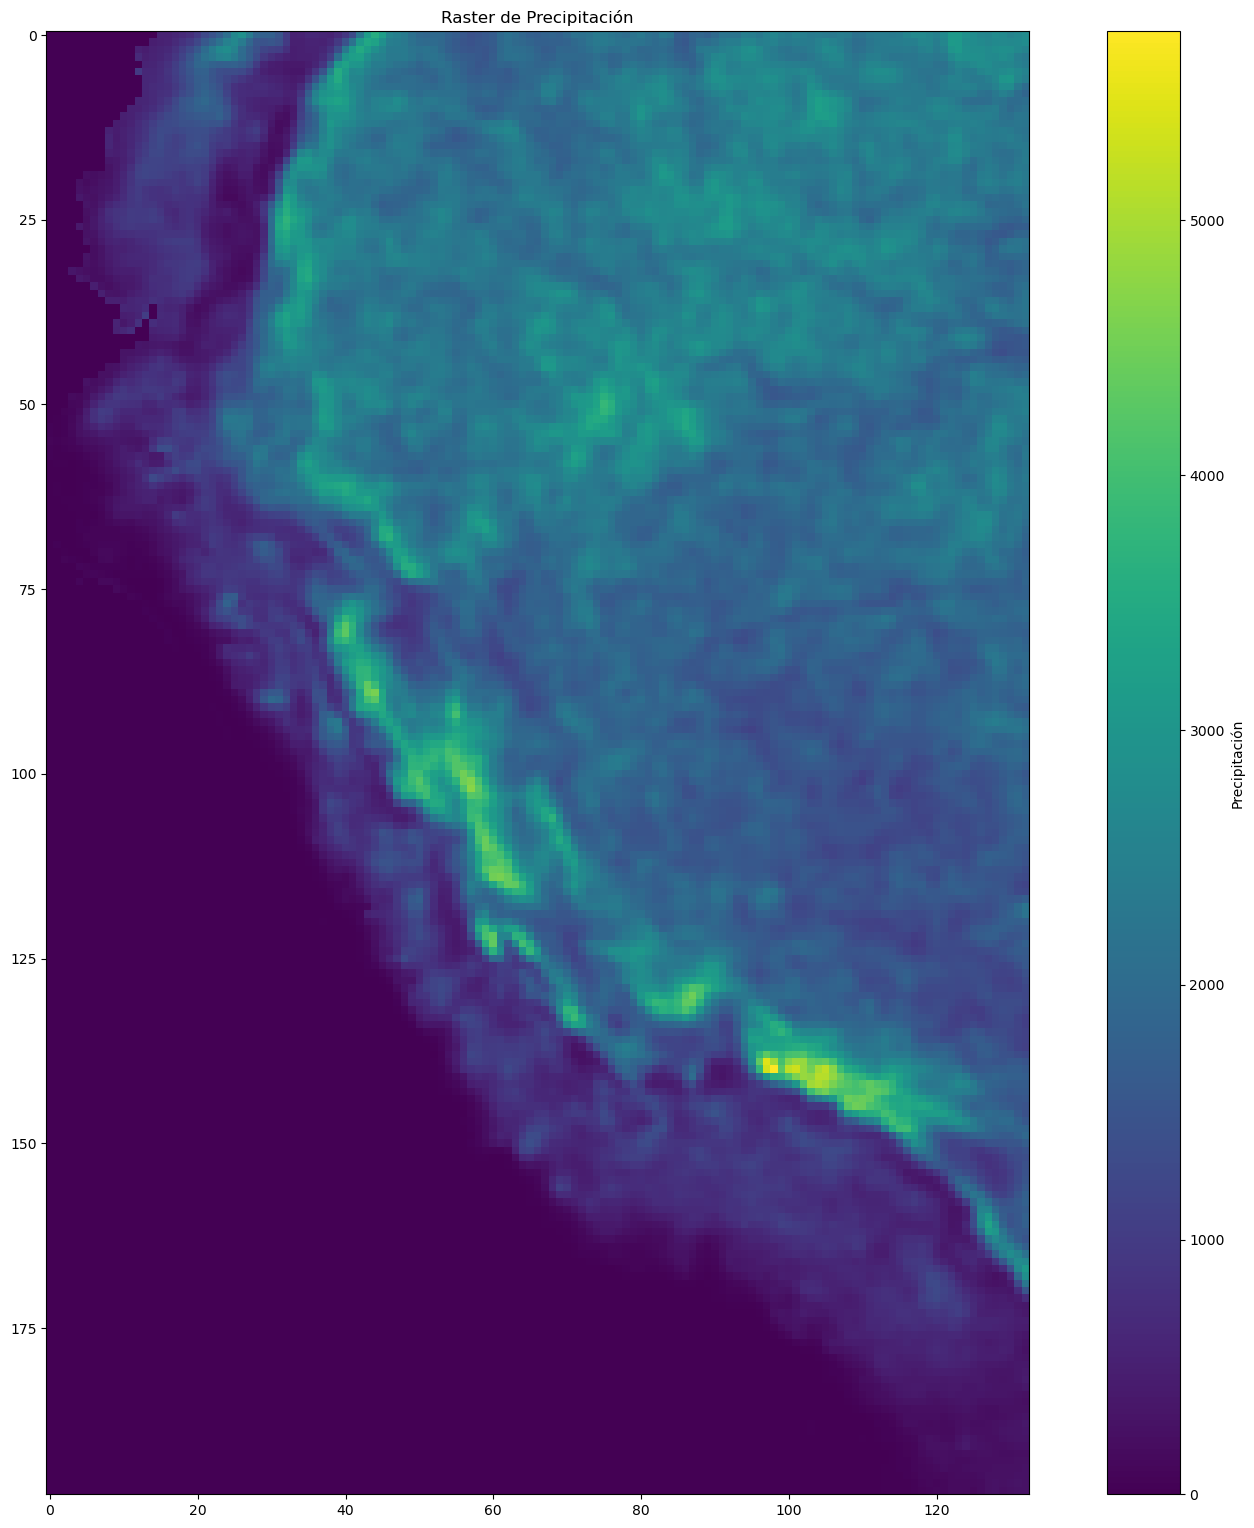

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 19))
plt.imshow(banda5, cmap='viridis')
plt.colorbar(label='Precipitación')
plt.title("Raster de Precipitación")
plt.show()

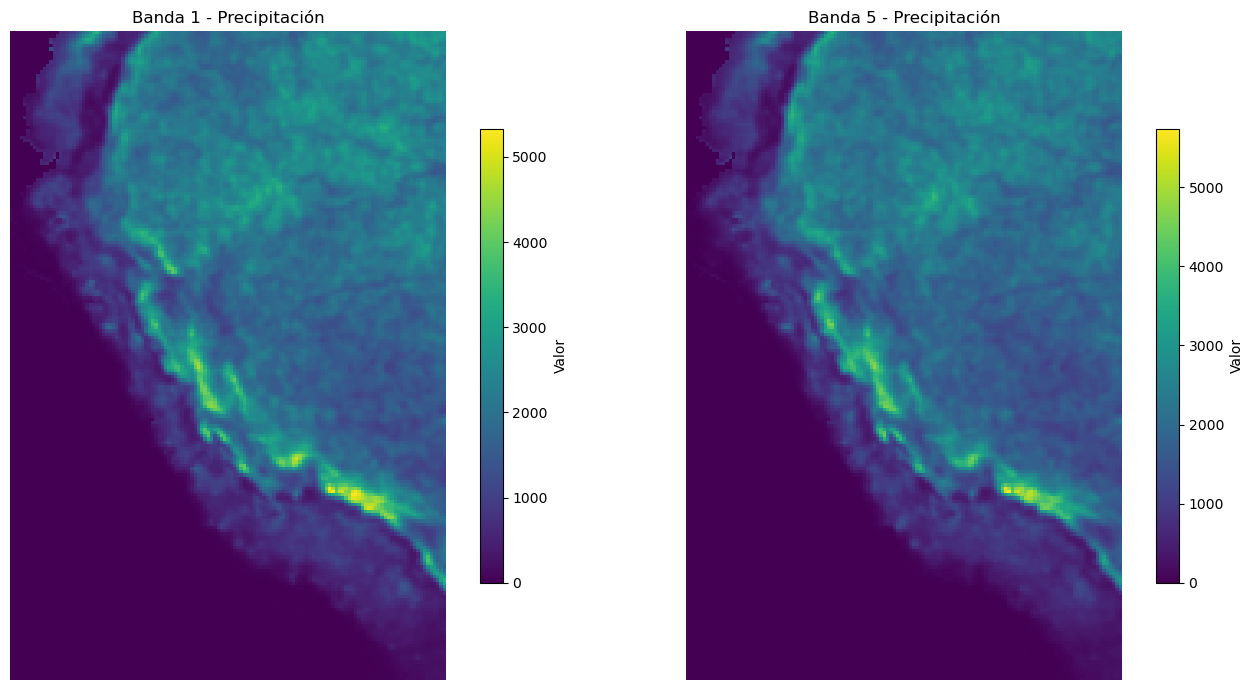

In [12]:
import rasterio
import matplotlib.pyplot as plt

# Ruta al archivo
archivo = "Prec_raster.tif"

# Abrir el archivo y leer banda 1 y banda 5
with rasterio.open(archivo) as src:
    banda1 = src.read(1)
    banda5 = src.read(5)

# Mostrar ambas bandas lado a lado
plt.figure(figsize=(14, 7))

# Banda 1
plt.subplot(1, 2, 1)
plt.imshow(banda1, cmap='viridis')
plt.title("Banda 1 - Precipitación")
plt.colorbar(shrink=0.7, label="Valor")
plt.axis('off')

# Banda 5
plt.subplot(1, 2, 2)
plt.imshow(banda5, cmap='viridis')
plt.title("Banda 5 - Precipitación")
plt.colorbar(shrink=0.7, label="Valor")
plt.axis('off')

plt.tight_layout()
plt.show()


# Merge with data of Peru

In [15]:
# Reproyectar shapefile si es necesario (para que coincida con el raster)
with rasterio.open("Prec_raster.tif") as src:
    if gdf.crs != src.crs:
        gdf = gdf.to_crs(src.crs)

    # Recortar el raster usando el shapefile
    out_image, out_transform = mask(src, gdf.geometry, crop=True)
    out_meta = src.meta.copy()

# Actualizar metadata para el nuevo raster recortado
out_meta.update({
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

# Guardar el nuevo raster recortado (opcional)
with rasterio.open("recorte.tif", "w", **out_meta) as dest:
    dest.write(out_image)

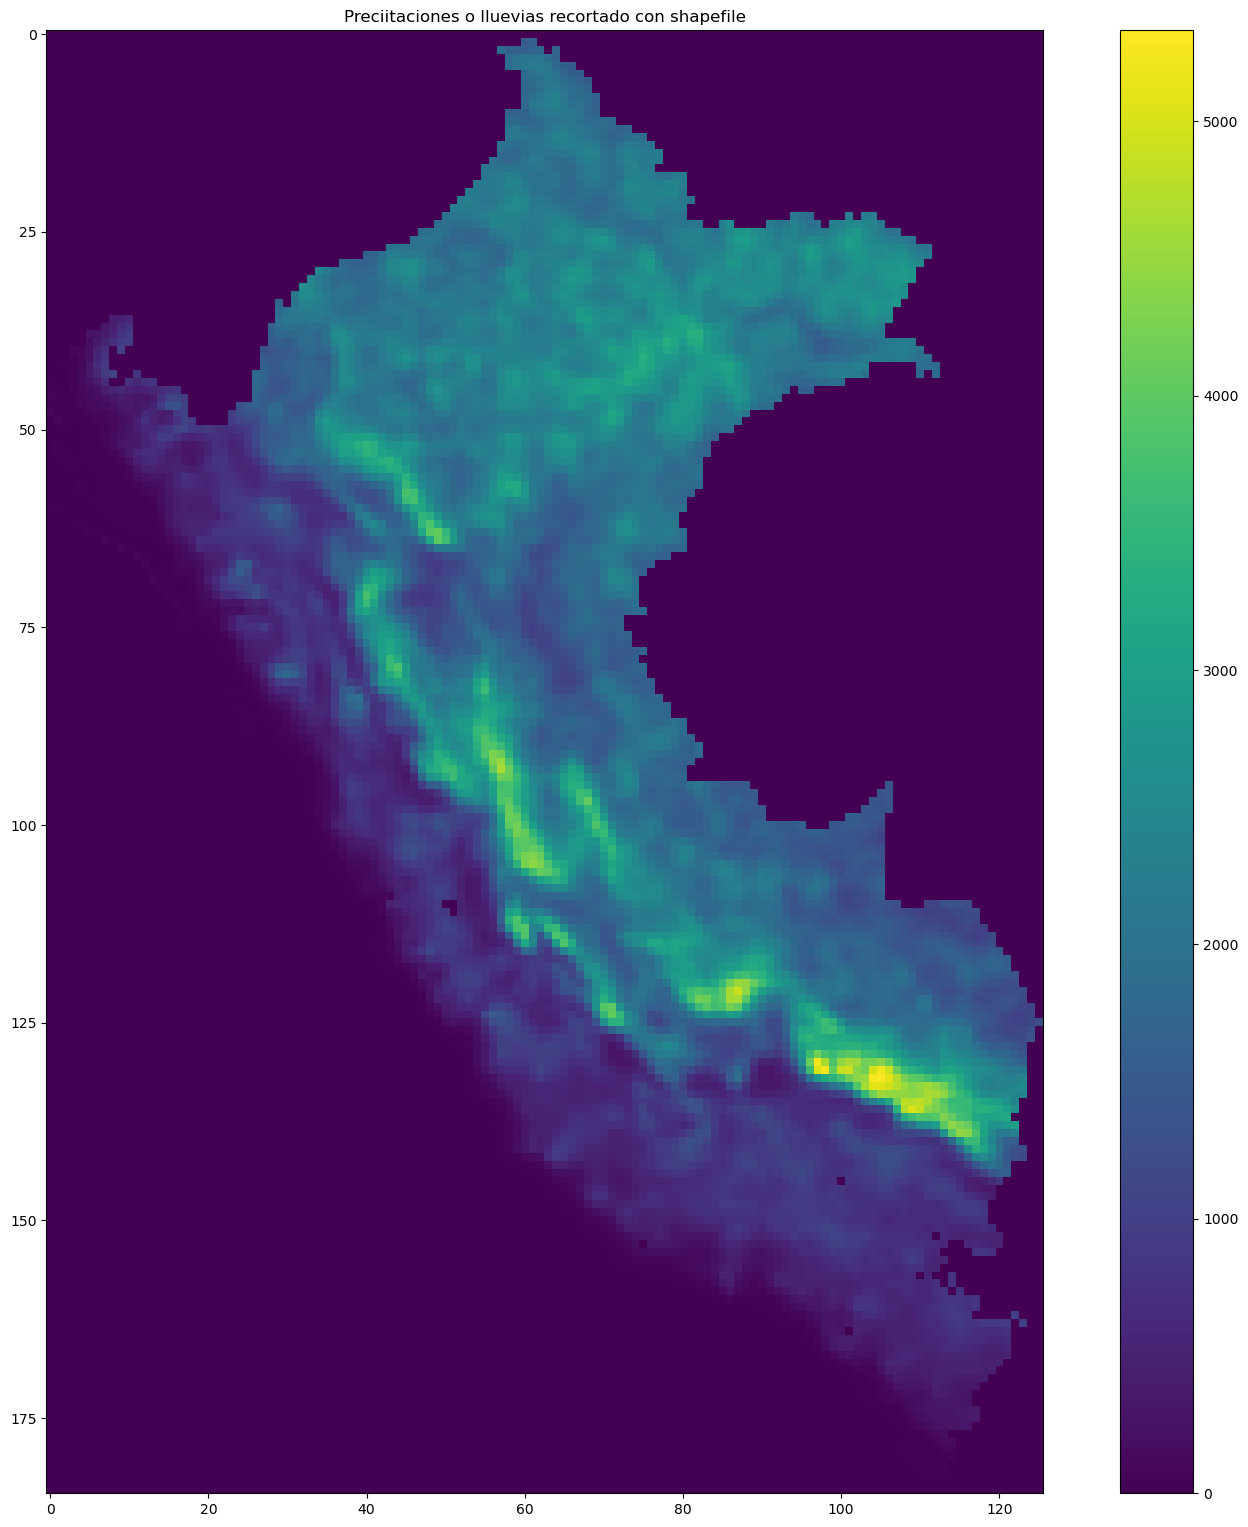

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 19))
plt.imshow(out_image[0], cmap='viridis')
plt.title("Preciitaciones o lluevias recortado con shapefile")
plt.colorbar()
plt.show()


In [14]:
# Filtrar los distritos que pertenecen a Loreto
loreto = gdf[gdf["DEPARTAMEN"] == "LORETO"]

# Unir todas las geometrías distritales en una sola para el recorte
loreto_union = loreto.unary_union


C:\Users\melor\AppData\Local\Temp\ipykernel_12696\3560601552.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  loreto_union = loreto.unary_union


In [15]:
import rasterio
from rasterio.mask import mask

# Abrir el raster y recortar con Loreto
with rasterio.open("Prec_raster.tif") as src:
    # Asegurarse de que las proyecciones coincidan
    if loreto.crs != src.crs:
        loreto = loreto.to_crs(src.crs)
        loreto_union = loreto.unary_union

    out_image, out_transform = mask(src, [loreto_union], crop=True)
    out_meta = src.meta.copy()

# Actualizar metadatos del nuevo raster recortado
out_meta.update({
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

# Guardar el recorte como archivo nuevo (opcional)
with rasterio.open("recorte_loreto.tif", "w", **out_meta) as dest:
    dest.write(out_image)


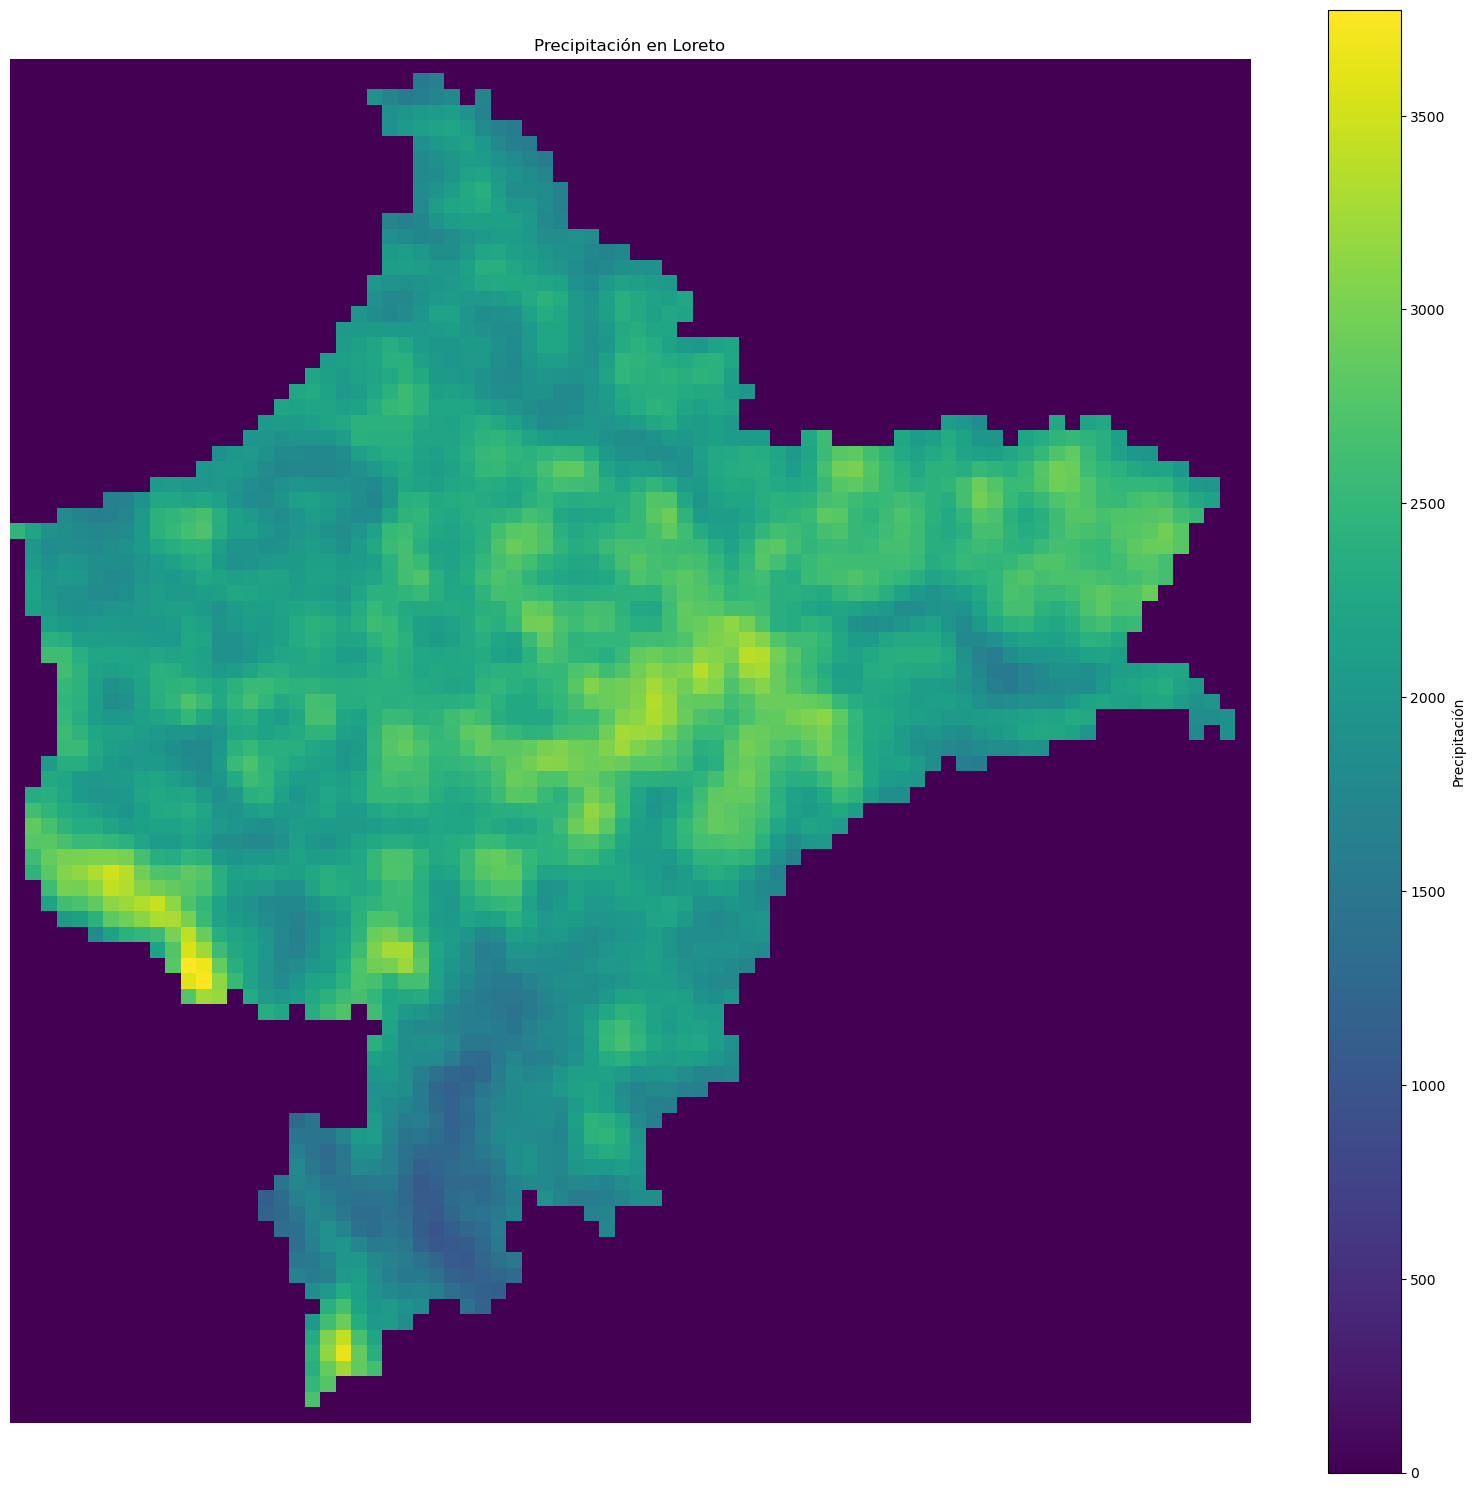

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 19))
plt.imshow(out_image[0], cmap="viridis")
plt.title("Precipitación en Loreto")
plt.colorbar(label="Precipitación")
plt.axis("off")
plt.show()


In [ ]:
import rasterio

# Ruta al archivo
archivo2 = "tmax_raster.tif"

# Abrir el archivo
with rasterio.open(archivo2) as src:
    print("Ancho:", src.width)
    print("Alto:", src.height)
    print("Número de bandas:", src.count)
    print("Sistema de coordenadas:", src.crs)
    print("Transformación (afín):", src.transform)

    # Leer los datos de la primera banda
    banda1 = src.read(1)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.imshow(banda1, cmap='viridis')
plt.colorbar(label='Precipitación')
plt.title("Raster de Precipitación")
plt.show()


✅ 1. Visualización de las 5 bandas (precipitación en el tiempo)

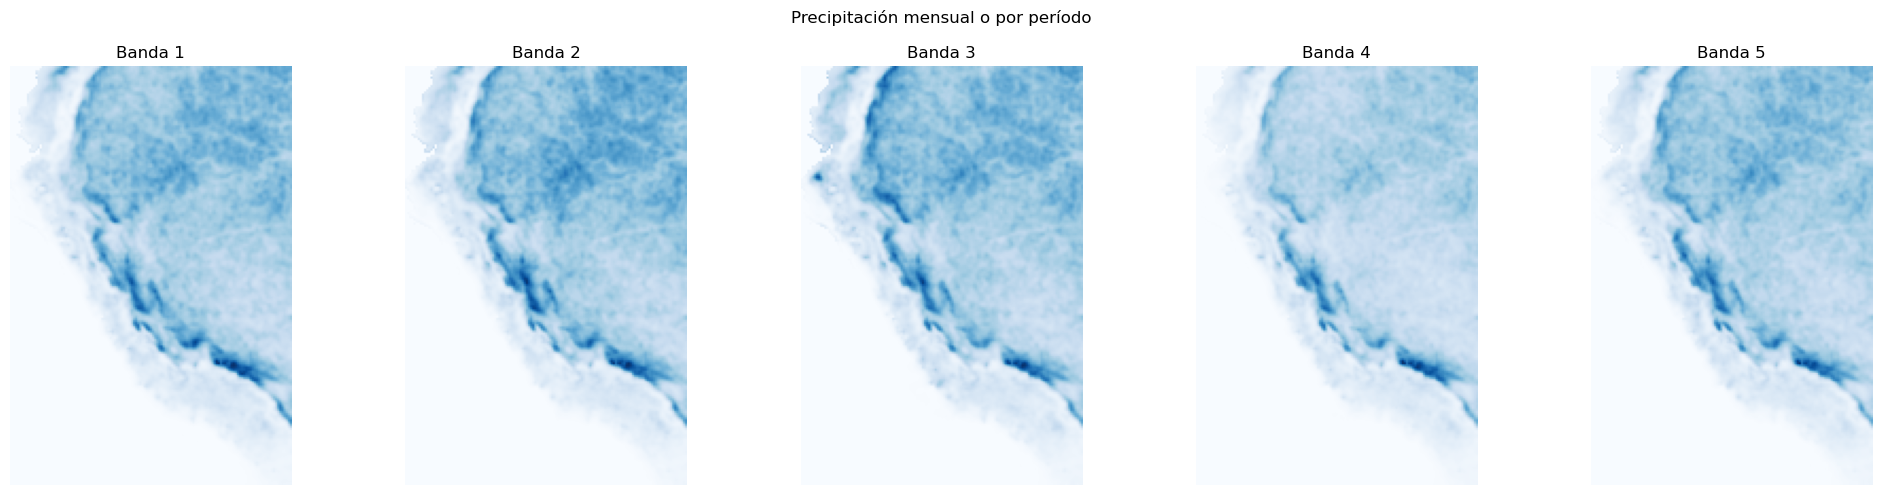

In [31]:
# Basado en la información proporcionada, sabemos que la columna con nombres es "DISTRITO"
nombre_columna = "DISTRITO"

# Visualizar el ráster original
with rasterio.open("Prec_raster.tif") as src:
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    for i in range(1, 6):
        banda = src.read(i)
        axs[i-1].imshow(banda, cmap="Blues")
        axs[i-1].set_title(f"Banda {i}")
        axs[i-1].axis("off")
    plt.suptitle("Precipitación mensual o por período")
    plt.tight_layout()
    plt.show()


✅ 2. Recorte del ráster completo (las 5 bandas) a Perú usando los distritos

In [23]:
from rasterio.mask import mask

# Abrir y recortar todas las bandas del ráster
with rasterio.open("Prec_raster.tif") as src:
    out_image, out_transform = mask(src, gdf.geometry, crop=True)
    out_meta = src.meta.copy()

out_meta.update({
    "driver": "GTiff",
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

# Guardar el nuevo ráster recortado
with rasterio.open("Prec_raster_peru.tif", "w", **out_meta) as dest:
    dest.write(out_image)


✅ 3. Calcular el promedio de precipitaciones en cada distrito a lo largo del tiempo

In [36]:
# Calcular estadísticas zonales por banda
promedios = []
for b in range(1, 6):
    stats = zonal_stats(gdf, "Prec_raster.tif", stats=["mean"], band=b)
    promedios.append([s["mean"] for s in stats])

# Crear columnas para cada banda en el GeoDataFrame
for i, valores in enumerate(promedios):
    gdf[f"prec_banda{i+1}"] = valores

# Calcular el promedio total de las 5 bandas
gdf["prec_promedio_total"] = gdf[[f"prec_banda{i+1}" for i in range(5)]].mean(axis=1)

# Mostrar resultados con los nombres de distritos
print(gdf[["DISTRITO", "prec_promedio_total"]].head())



                 DISTRITO  prec_promedio_total
0         CODO DEL POZUZO          3206.759375
1             TOURNAVISTA          1789.191479
2  ALEXANDER VON HUMBOLDT          1772.605688
3                 IRAZOLA          2866.884271
4                 NESHUYA          2037.506616


✅ 4. Clasificación de distritos según umbral de precipitación


Columnas disponibles en el dataframe:
['IDDPTO', 'DEPARTAMEN', 'IDPROV', 'PROVINCIA', 'IDDIST', 'DISTRITO', 'CAPITAL', 'CODCCPP', 'AREA', 'FUENTE', 'geometry', 'prec_banda1', 'prec_banda2', 'prec_banda3', 'prec_banda4', 'prec_banda5', 'prec_promedio_total']


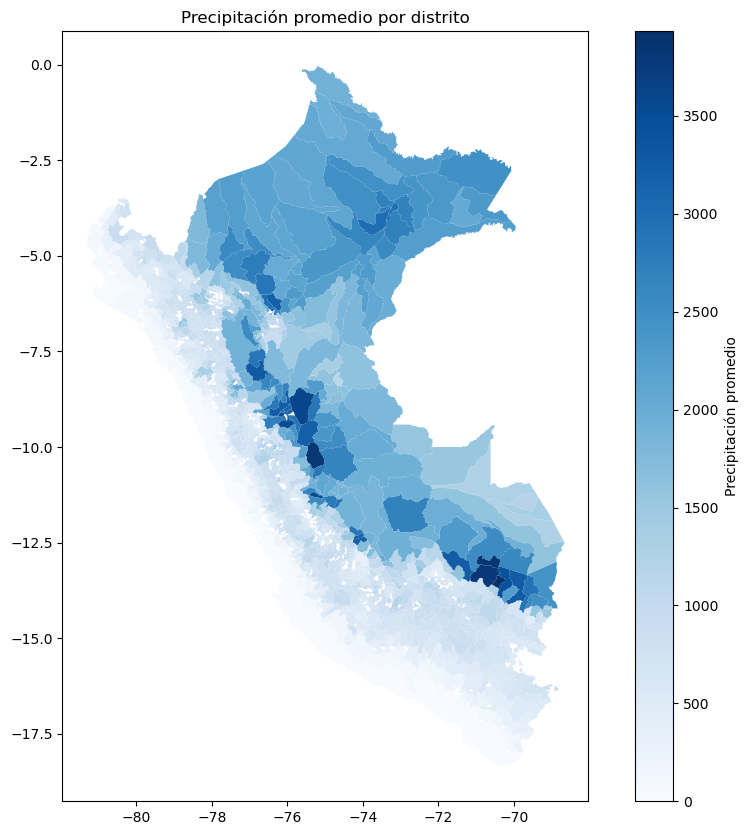

In [35]:
# Visualizar los resultados en un mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf.plot(column="prec_promedio_total", 
         ax=ax, 
         legend=True, 
         cmap="Blues", 
         legend_kwds={'label': "Precipitación promedio"})
ax.set_title("Precipitación promedio por distrito")

# Primero, verifiquemos los nombres exactos de las columnas
print("\nColumnas disponibles en el dataframe:")
print(gdf.columns.tolist())


In [37]:
gdf.head()

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry,prec_banda1,prec_banda2,prec_banda3,prec_banda4,prec_banda5,prec_promedio_total
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...",3189.469952,2880.826923,3535.106671,3134.659856,3293.733474,3206.759375
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",1741.302002,1667.276978,1974.040649,1640.148315,1923.189453,1789.191479
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...",1638.798340,1677.428711,1955.428345,1562.958984,2028.414062,1772.605688
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...",2646.981250,2685.774479,3212.501302,2721.434635,3067.729688,2866.884271
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...",1943.351440,2118.568848,2185.728760,1656.733643,2283.150391,2037.506616


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.gridspec import GridSpec

# Configuración para mejor visualización
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

In [44]:
# Crear una columna de departamento para análisis si no existe
if 'DEPARTAMENTO' not in gdf.columns:
    if 'DEPARTAME' in gdf.columns:
        gdf['DEPARTAMENTO'] = gdf['DEPARTAME']
    elif 'IDDPTO' in gdf.columns:
        # Mapeo completo de códigos de departamento a nombres en Perú
        dpto_map = {
            '01': 'AMAZONAS',
            '02': 'ANCASH',
            '03': 'APURIMAC',
            '04': 'AREQUIPA',
            '05': 'AYACUCHO',
            '06': 'CAJAMARCA',
            '07': 'CALLAO',
            '08': 'CUSCO',
            '09': 'HUANCAVELICA',
            '10': 'HUANUCO',
            '11': 'ICA',
            '12': 'JUNIN',
            '13': 'LA LIBERTAD',
            '14': 'LAMBAYEQUE',
            '15': 'LIMA',
            '16': 'LORETO',
            '17': 'MADRE DE DIOS',
            '18': 'MOQUEGUA',
            '19': 'PASCO',
            '20': 'PIURA',
            '21': 'PUNO',
            '22': 'SAN MARTIN',
            '23': 'TACNA',
            '24': 'TUMBES',
            '25': 'UCAYALI'
        }
        # Aplicar el mapeo, asegurando que siempre hay un nombre de departamento
        gdf['DEPARTAMENTO'] = gdf['IDDPTO'].astype(str).map(lambda x: dpto_map.get(x, f"DPTO_{x}"))

# 1. Análisis Estadístico Básico
print("Estadísticas descriptivas de precipitación promedio:")
stats = gdf['prec_promedio_total'].describe()
print(stats)

Estadísticas descriptivas de precipitación promedio:
count    1510.000000
mean      814.500615
std       686.894813
min         0.000000
25%       376.989083
50%       723.238727
75%       979.082208
max      3932.268945
Name: prec_promedio_total, dtype: float64


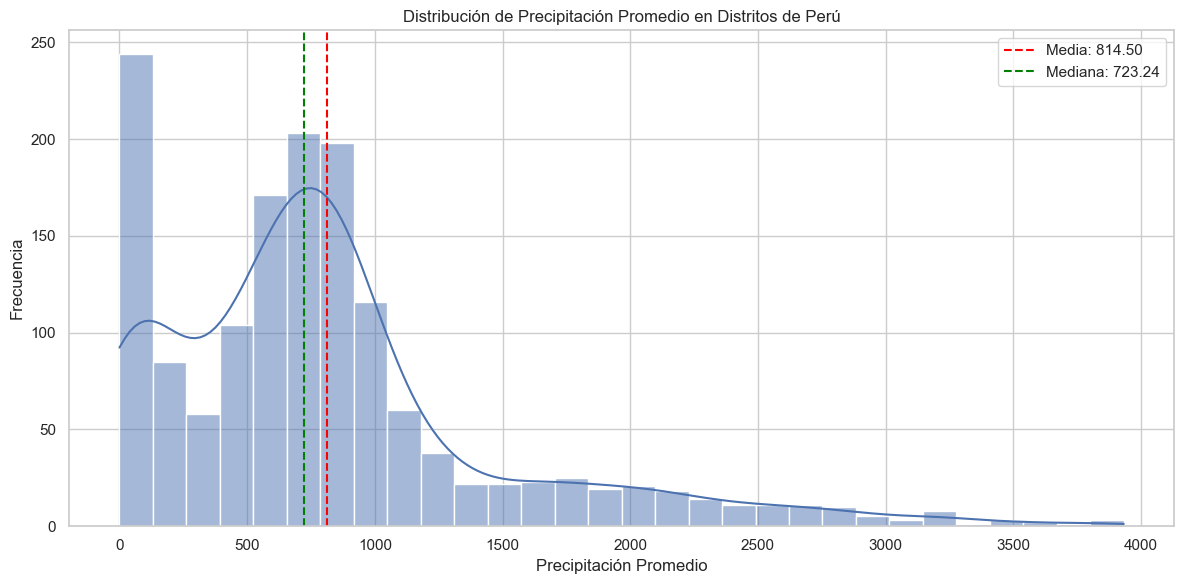

In [41]:
# 2. Histograma de Precipitación Promedio
plt.figure(figsize=(12, 6))
sns.histplot(gdf['prec_promedio_total'], kde=True, bins=30)
plt.title('Distribución de Precipitación Promedio en Distritos de Perú')
plt.xlabel('Precipitación Promedio')
plt.ylabel('Frecuencia')
plt.axvline(gdf['prec_promedio_total'].mean(), color='red', linestyle='--', 
            label=f'Media: {gdf["prec_promedio_total"].mean():.2f}')
plt.axvline(gdf['prec_promedio_total'].median(), color='green', linestyle='--', 
            label=f'Mediana: {gdf["prec_promedio_total"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.savefig('histograma_precipitacion.png', dpi=300)
plt.show()

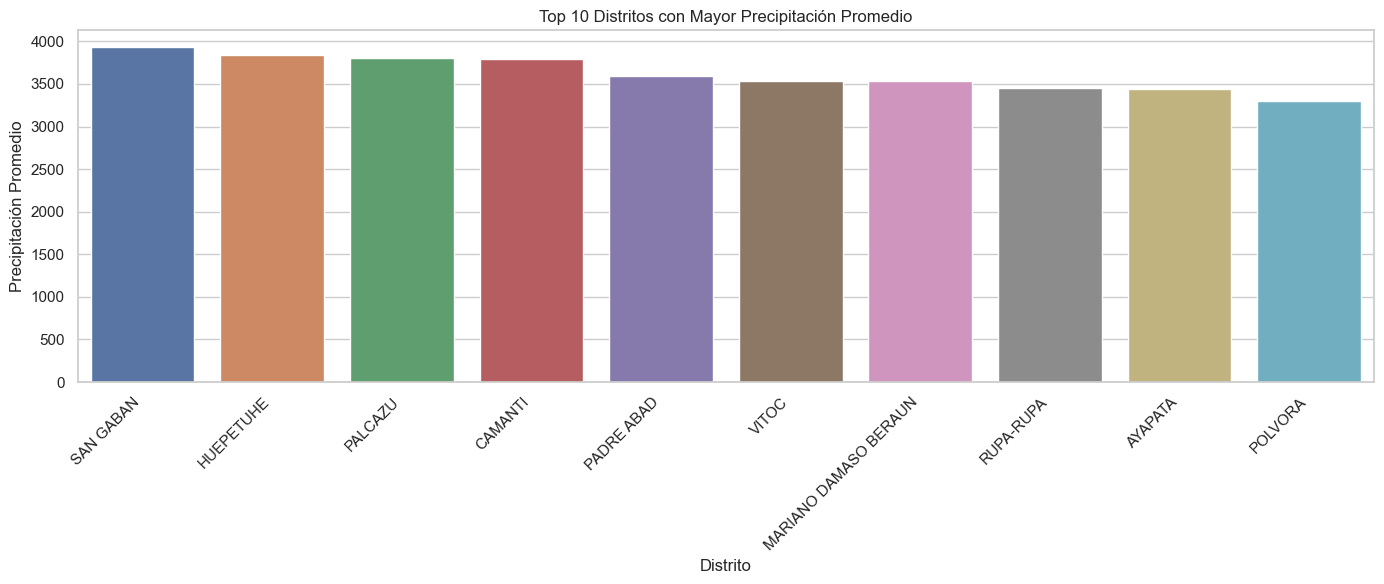

In [42]:
# 3. Top 10 distritos con mayor precipitación
top10 = gdf.sort_values(by='prec_promedio_total', ascending=False).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x='DISTRITO', y='prec_promedio_total', data=top10)
plt.title('Top 10 Distritos con Mayor Precipitación Promedio')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Distrito')
plt.ylabel('Precipitación Promedio')
plt.tight_layout()
plt.savefig('top10_distritos_precipitacion.png', dpi=300)
plt.show()

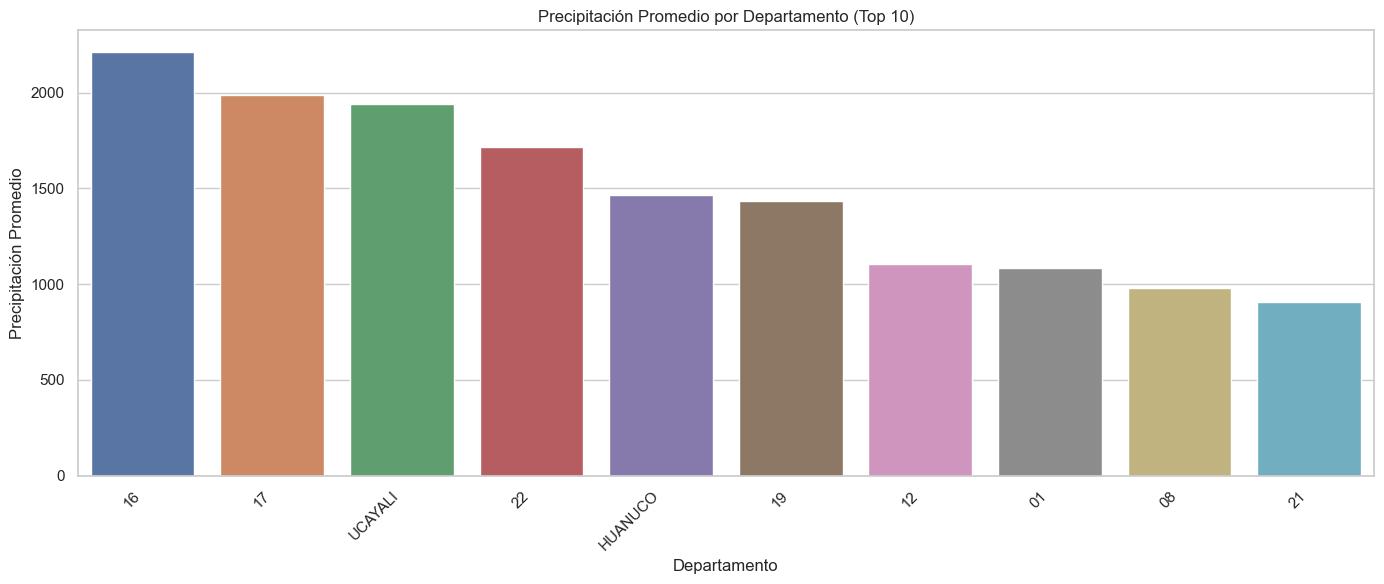

In [45]:
# Graficar precipitación media por departamento (top 10 departamentos)
top_depts = dept_stats.head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_depts.index, y=top_depts['mean'])
plt.title('Precipitación Promedio por Departamento (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Departamento')
plt.ylabel('Precipitación Promedio')
plt.tight_layout()
plt.savefig('precipitacion_por_departamento.png', dpi=300)
plt.show()

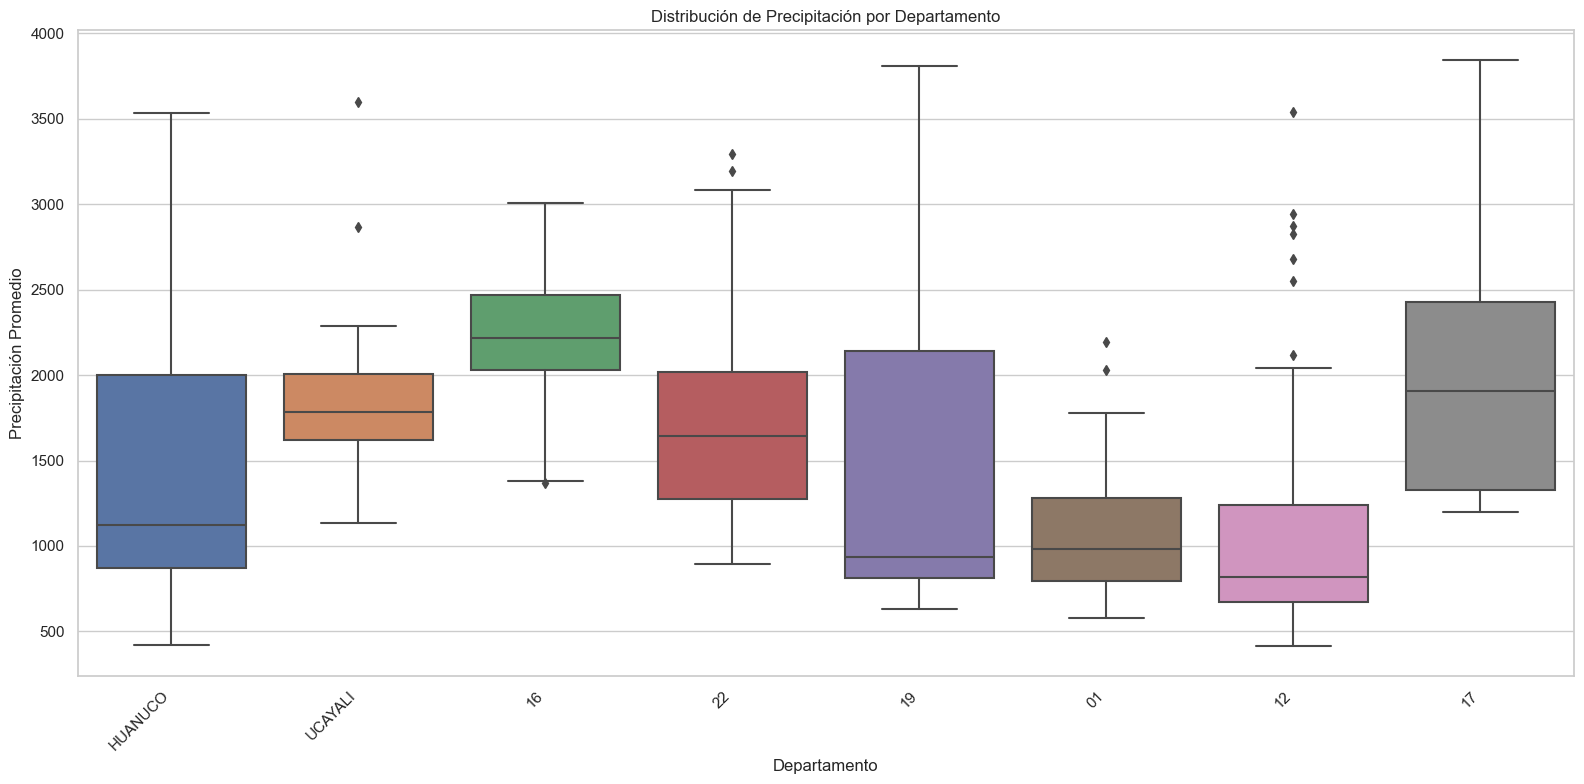

In [46]:
# 5. Boxplots por Departamento (para ver distribución y outliers)
# Limitar a los 8 departamentos con más precipitación para mejor visualización
top_dept_names = dept_stats.head(8).index.tolist()
dept_data = gdf[gdf['DEPARTAMENTO'].isin(top_dept_names)]

plt.figure(figsize=(16, 8))
sns.boxplot(x='DEPARTAMENTO', y='prec_promedio_total', data=dept_data)
plt.title('Distribución de Precipitación por Departamento')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Departamento')
plt.ylabel('Precipitación Promedio')
plt.tight_layout()
plt.savefig('boxplot_precipitacion_departamentos.png', dpi=300)
plt.show()


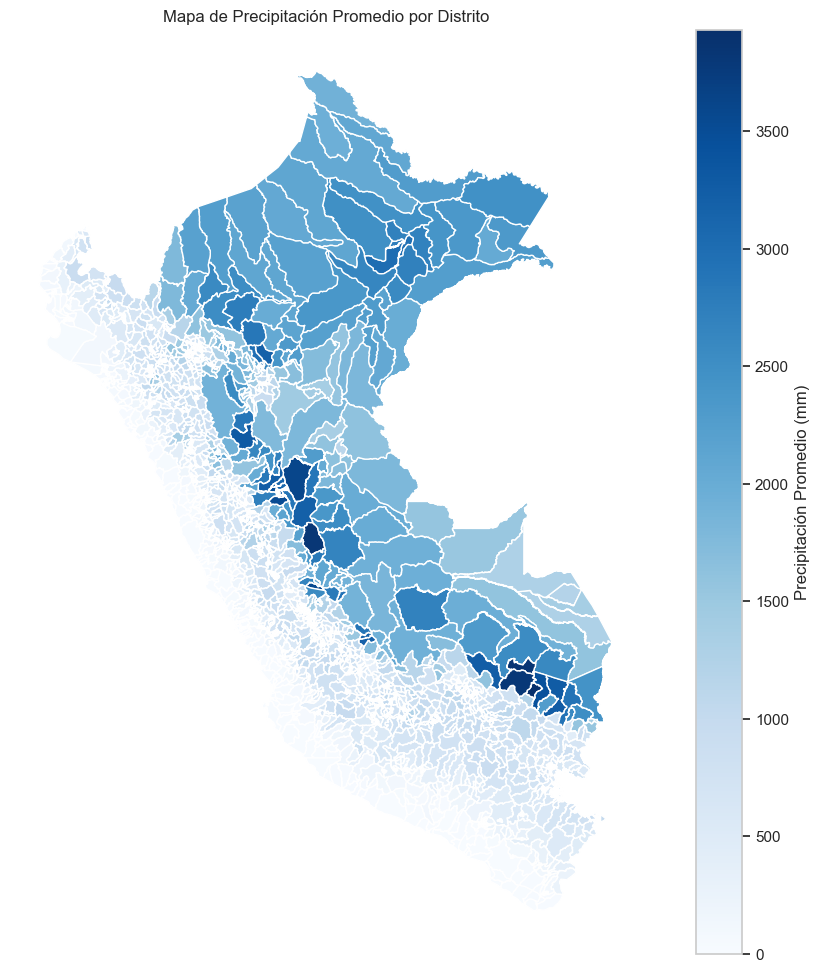

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
gdf.plot(column='prec_promedio_total', cmap='Blues', legend=True, 
         legend_kwds={'label': "Precipitación Promedio (mm)"},
         ax=ax)
ax.set_title('Mapa de Precipitación Promedio por Distrito')
ax.set_axis_off()
plt.savefig('mapa_precipitacion.png', dpi=300, bbox_inches='tight')
plt.show()

RASTER
> Este tipo de proyectos no solo permiten aplicar habilidades técnicas en programación, datos y SIG, sino que también abren la puerta a generar un impacto real en la sociedad. Al trabajar con datos ambientales, climáticos o territorialeS para contribuir con soluciones a problemas concretos que afectan a comunidades enteras, desde la agricultura hasta la gestión de riesgos.


# TIF OF TEMPERATURE

In [51]:
import rasterio

# Ruta al archivo
archivo3 = "tmin_raster.tif"

# Abrir el archivo
with rasterio.open(archivo3) as src:
    print("Ancho:", src.width)
    print("Alto:", src.height)
    print("Número de bandas:", src.count)
    print("Sistema de coordenadas:", src.crs)
    print("Transformación (afín):", src.transform)

    # Leer los datos de la primera banda
    banda1 = src.read(1)


Ancho: 285
Alto: 397
Número de bandas: 5
Sistema de coordenadas: EPSG:4326
Transformación (afín): | 0.05, 0.00,-81.38|
| 0.00,-0.05, 1.20|
| 0.00, 0.00, 1.00|


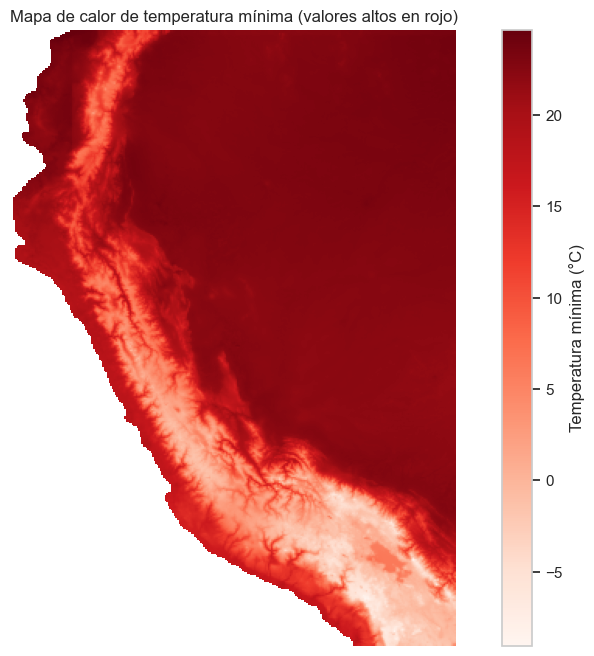

In [49]:
import matplotlib.pyplot as plt
from rasterio.plot import plotting_extent
import rasterio

# Leer raster y obtener extensión geográfica
with rasterio.open("tmin_raster.tif") as src:
    extent = plotting_extent(src)
    banda1 = src.read(1)

# Mostrar mapa con colormap invertido (rojo = caliente)
plt.figure(figsize=(12, 8))
img = plt.imshow(banda1, cmap='Reds', extent=extent, origin='upper')  # 🔁 inferno_r = rojo para valores altos
cbar = plt.colorbar(img, label='Temperatura mínima (°C)')
plt.title("Mapa de calor de temperatura mínima (valores altos en rojo)")
plt.axis("off")
plt.show()




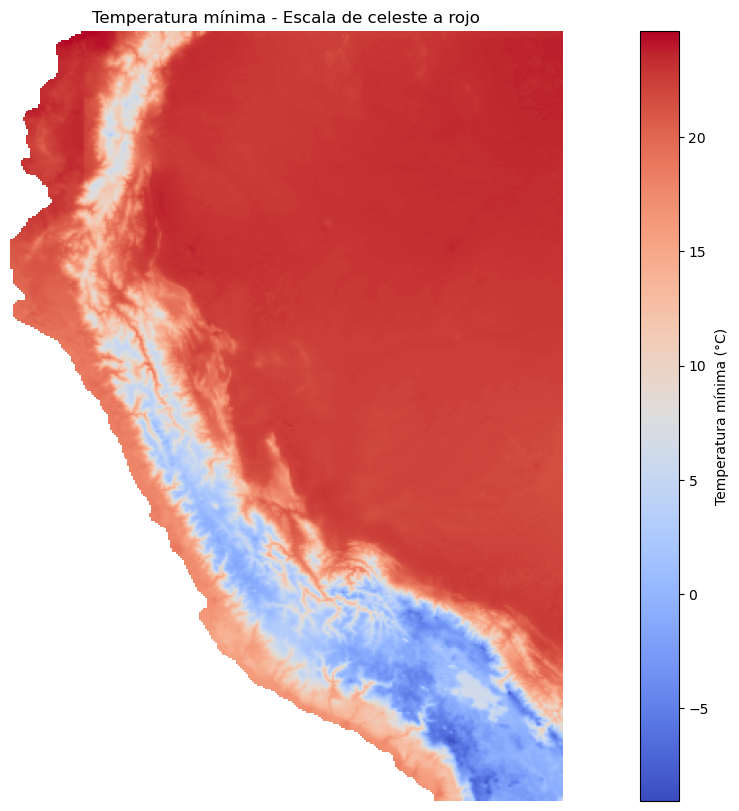

In [64]:
plt.figure(figsize=(20, 10))
img = plt.imshow(banda1, cmap='coolwarm', extent=extent, origin='upper')
cbar = plt.colorbar(img, label='Temperatura mínima (°C)')
plt.title("Temperatura mínima - Escala de celeste a rojo")
plt.axis("off")
plt.show()


In [ ]:
import rasterio

# Ruta al archivo
archivo2 = "peru_coverage_2022.tif"

# Abrir el archivo
with rasterio.open(archivo2) as src:
    print("Ancho:", src.width)
    print("Alto:", src.height)
    print("Número de bandas:", src.count)
    print("Sistema de coordenadas:", src.crs)
    print("Transformación (afín):", src.transform)

    # Leer los datos de la primera banda
    banda1 = src.read(1)


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(banda1, cmap='viridis')
plt.colorbar(label='Precipitación')
plt.title("Raster de Precipitación")
plt.show()